### **Notebook used for the Majority Vote**
------

In [3]:
# We load the functions needed for the resolution
load("artifact_common_functions.sage")

In [8]:
def get_one_candidate(indice = -1, error_value = 1, return_error = False):

    # Test for vector with perfect knowledge w error
    t0_moins_s2 = []
    for vector_ in range(dilithium.K):
        X = np.array(C_tilde[vector_], dtype = int)
        y = np.array(c_t0_moins_s2[vector_], dtype = int)
        if vector_ == 3:

            # rand_indice = np.random.randint(0, 10)
            # y[rand_indice] += pow(-1, np.random.randint(2))
            if indice == -1:
                for i in range(dilithium.N):

                    if np.random.binomial(n=1, p= 0.0039) == 1:
                        y[i] += 1
            else:
                y[indice] += error_value
        # Swap positive rpz of negative values with negative values
        np_X2 = np_remainder(X, dilithium.Q)
        np_y2 = np_remainder(y, dilithium.Q)

        # round to the nearest integer
        tps1 = time.time()
        np_found_t0_moins_s2 = np.rint(np.linalg.lstsq(np_X2, np_y2, rcond=None)[0])
        tps2 = time.time()

        # print(">>> temps lsm : ", tps2 - tps1)
        if return_error == False:
            np_s = np_remainder(np.array(list(poly_t0s2[vector_]), dtype = int), dilithium.Q)

            error = np.count_nonzero(np_s - np_found_t0_moins_s2)
            #print("number of wrong coefficients: ", error)
        else:
            if vector_ == 3:
                np_s = np_remainder(np.array(list(poly_t0s2[vector_]), dtype = int), dilithium.Q)

                error = np.count_nonzero(np_s - np_found_t0_moins_s2)       
                print("number of wrong coefficients: ", error)             
        t0_moins_s2.append(list(np_found_t0_moins_s2))

    #return vector(R, t0_moins_s2)
    if return_error == True:
        return t0_moins_s2, error
    return t0_moins_s2

In [9]:
# pk/ sk used for the attack
version = {2 : {"pk" : "1C0EE1111B08003F28E65E8B3BDEB037CF8F221DFCDAF5950EDB38D506D85BEF6177E3DE0D4F1EF5847735947B56D08E841DB2444FA2B729ADEB1417CA7ADF42A1490C5A097F002760C1FC419BE8325AAD0197C52CED80D3DF18E7774265B289912CECA1BE3A90D8A4FDE65C84C610864E47DEECAE3EEA4430B9909559408D11A6ABDB7DB9336DF7F96EAB4864A6579791265FA56C348CB7D2DDC90E133A95C3F6B13601429F5408BD999AA479C1018159550EC55A113C493BE648F4E036DD4F8C809E036B4FBB918C2C484AD8E1747AE05585AB433FDF461AF03C25A773700721AA05F7379FE7F5ED96175D4021076E7F52B60308EFF5D42BA6E093B3D0815EB3496646E49230A9B35C8D41900C2BB8D3B446A23127F7E096D85A1C794AD4C89277904FC6BFEC57B1CDD80DF9955030FDCA741AFBDAC827B13CCD5403588AF4644003C2265DFA4D419DBCCD2064892386518BE9D51C16498275EBECF5CDC7A820F2C29314AC4A6F08B2252AD3CFB199AA42FE0B4FB571975C1020D949E194EE1EAD937BFB550BB3BA8E357A029C29F077554602E1CA2F2289CB9169941C3AAFDB8E58C7F2AC77291FB4147C65F6B031D3EBA42F2ACFD9448A5BC22B476E07CCCEDA2306C554EC9B7AB655F1D7318C2B7E67D5F69BEDF56000FDA98986B5AB1B3A22D8DFD6681697B23A55C96E8710F3F98C044FB15F606313EE56C0F1F5CA0F512E08484FCB358E6E528FFA89F8A866CCFF3C0C5813147EC59AF0470C4AAD0141D34F101DA2E5E1BD52D0D4C9B13B3E3D87D1586105796754E7978CA1C68A7D85DF112B7AB921B359A9F03CBD27A7EAC87A9A80B0B26B4C9657ED85AD7FA2616AB345EB8226F69FC0F48183FF574BCD767B5676413ADB12EA2150A0E97683EE54243C25B7EA8A718606F86993D8D0DACE834ED341EEB724FE3D5FF0BC8B8A7B8104BA269D34133A4CF8300A2D688496B59B6FCBC61AE96062EA1D8E5B410C5671F424417ED693329CD983001FFCD10023D598859FB7AD5FD263547117100690C6CE7438956E6CC57F1B5DE53BB0DC72CE9B6DEAA85789599A70F0051F1A0E25E86D888B00DF36BDBC93EF7217C45ACE11C0790D70E9953E5B417BA2FD9A4CAF82F1FCE6F45F53E215B8355EF61D891DF1C794231C162DD24164B534A9D48467CDC323624C2F95D4402FF9D66AB1191A8124144AFA35D4E31DC86CAA797C31F68B85854CD959C4FAC5EC53B3B56D374B888A9E979A6576B6345EC8522C9606990281BF3EF7C5945D10FD21A2A1D2E5404C5CF21220641391B98BCF825398305B56E58B611FE5253203E3DF0D22466A73B3F0FBE43B9A62928091898B8A0E5B269DB586B0E4DDEF50D682A12D2C1BE824149AA254C6381BB412D77C3F9AA902B688C81715A59C839558556D35ED4FC83B4AB18181F40F73DCD76860D8D8BF94520237C2AC0E463BA09E3C9782380DC07FE4FCBA340CC2003439FD2314610638070D6C9EEA0A70BAE83B5D5D3C5D3FDE26DD01606C8C520158E7E5104020F248CEAA666457C10AEBF068F8A3BD5CE7B52C6AF0ABD5944AF1AD4752C9113976083C03B6C34E1D47ED69644CAD782C2F7D05F8A148961D965FA2E1723A8DDEBC22A90CD783DD1F4DB38FB9AE5A6714B3D946781643D317B7DD79381CF789A9588BB3E193B92A0B60D6B07D047F6984B0609EC57543C394CA8D5E5BCC2A731A79618BD1E2E0DA8704AF98F20F5F8F5452DDF646B95B341DD7F0D2CC1FA15BD9895CD5B65AA1CB94B5E2E788FDA9825B656639193D98328154A4F2C35495A38B6EA0D2FFAAA35DF92C203C7F31CBBCA7BD03C3C2302190CECD161FD49237E4F839E3F3",
                "sk" : "1C0EE1111B08003F28E65E8B3BDEB037CF8F221DFCDAF5950EDB38D506D85BEF394D1695059DFF40AE256C5D5EDABFB69F5F40F37A588F50532CA408A8168AB187D0AD11522110931494BF2CAEAE36979711BC585B32F08C78496F379D604D53C0A6711A966C11312AD9A821D8086542A600A4B42C1940720242628106210A43852331709308108B188C022492C1B28412C4218B042181C8610248059C9201C0348819326C582046891868A2C28D82346A1C094200A28CE3A6491C112CC24812E0902191985062C084622451CA062C64240E1BB3312496854B4606DB2668C38268441046C9B6211404811445502442084422710B92459AA0811A91709C241003957004C504C82692D29200C0B260C0A26809190AA2300E188969E0008DD84862DA14712018051907440412409B1240118010D142819928508B1091022464A0206D1246211C838C1B4769010690CC062481846920982C24120521B15041360298446ED1A63111056AD3A840CAA84C62B00003134A53344614194004C54CE306695AB08961168ECB10808B168ED990640B94602483851AB30454262251B8251C424A0B814842C4445A102023808409B7254CC64814854D19380E601651D8326A0A918908C170E0964D18468C01328D91C4054A0061230868A2104210A8611306218A248E620689C9B24508278451200D980466DC42054424852426282221612016090BA62C0A1144E0928158480D422210A006098B246E81288CC0248090308D8436404CA68450042494B68DA2926D18B344A00085E3B805140504A4C290842281C3262D0B2066CC903198382810166CC13445C0102224C688034632D840901C20680415289A188144988D9C206E9C302CC1B820614221080310A0C28C58128553204C0330814CA48D44C08D51404C1CA72C440865A03840DA20808106858C260DE2A88C9C4411594228C42604441426A1426408C0851101869B483199B20C80464459A88C0042089882900AB54562244812960544124600C88813A061E1284D0AB9914B962099B84400314E98128500B60183A00D14150E1881101901224A06681A498DE1A28411C63121262591A06D030524A1B6089444724334125BB42041B650D0888D0B074D1C94644C208E8B8808E0300944200549864D03134E19C9840937611A43684A80900204311C1742184080C8308EE1A241C33404A3282251247188D6FEF46712CA182872AB2919678AFF9D94E743E063A39E0C35CAF72A7F2EDA28E65858520D5D8467DE747CF340653B52C268F55413F5ADDC7D49011EC33EDD537423A84288869337AEA0781A124269071451722DB3BB8F2CE5B1552F83D2AF07F25613918A9F4E6F1257603888E589308CA5F95F07143D23BAAE17520B36B6E0E94FAF6845EB2131AEC383E63BC8644EE5F1ACCBA82F9211E57AFCBF509C1131A37466BC91B357DCBBBC14CCC319C4CC6AC75FCDC82C6596D07770C8277AD370B192A0B4E05F812E0E265D2912AA29F03FC9F72DFA69C9B1291A3FC583642B235F6991A954788347F60A0328C48ECEE51BA02DFF323ABD911667CB14549B618F1C5D250CAC9E35E071601992FBEC0BAE6F74213081404744D12F2A0E04BDB265E0924CADA40D1FA1F38ACA4606BFD4575712B8260A456FDDEEEFE7CA259BCDA97B9B939A5FD2889C9B49FB7D4E3553DEA61B3339BD0E6B16BF3BB227103BF9202E72DC502E28F7CE1559A4631F372520324E4EBA07545F78BF4D94B0E5B8BF51B8F176533D5CFEA5232F283A47605FA65DDB17C891C251011C4E98EEB6EB00CB65BA31C8F025C87A9FE02DBC10C5D83A065EBA5D7B2A19D5A1CB2C160AE166E867F2AF8C7D49D63FB83A614957FC0A3B5A5C74990E9A2B02120C7E6DE37E155FB472F50F0A45E47CF5F9D7A4C82982C9DC86AE877C3FD1885943E439FB003C7A9A42F71B4FF6F0A28B140CBDBA6E71B13AC31B23DE9EAB7837E15A69F833EB7B56A71D8BC2CAF1F2A31C345BD5F46EE013A7C689372337191DAA800C0AC6C46C9FF688B1A01347F257C474AA3D97C1D63A8C00E0A37B681673F57C1C9C8FCCD46F174C74A29D84CEB71F7E6B2F8CD2B089ED43F7C96DAE81A223418C20B16F1DF3D1A978AE28F6DF35EC559D04D20EC74B224AEA31A289B015B069E9CBBBF7CF6DE94CFB2A96E4AE3462C96003CDDA87DB561AF2CE3C0BA1D90413FDCE3CCF4390C02C1CB9F654F4820EC33015457D4A629FBF39419CAB7642D6885E103FCE0D4206CCE7C12C6FC44FA33AD0864C3371A7CBE820E3B371B656A38F2E7FF18FE4A50C8AB3F85D783FB57835CED8490B84EE0D99AF0D64C483CEB6366FF54F8AC8A40DB1AFA573A4FB326C74F0236ECEF3DA7120665CCE05DD654B5071723A8348E7CD7793513819B61CB64E1328E8B22E7664BD6B41B5710D19EA8809D4450850E907DFC4D0B75F588CECE962E9E0937CE1402446A4D2891A46E6617FB29D4FCD712606F7819ECA60F7E0D5B19E7FFB57C73C16FFEEB90038410CB9FCBB5E9D51EB3EB6297E9FF6AB7088FE2D9B237BC24CF7F8290118A5E0E00A0B903FB6375C848176CD0A8C8875CC59199CDA11A87A78F65CC404330B087571FD0633E27129FDAB5A8A1F793E52412B0083FD5C74DB3CF60C2543CE7C91B2800E40203F8D99FE5FDE5B108E7EDC80EBB9BB34986EC5C5A8F580E75752907FF0F294C866C2CF1F362E840B6881BD43219201781C63B0039A95BCFB4A0FECE569DF00523CE9C084B022B3B022242E28419796ACF0A0C995F948DBFFFD30D77ED105A3C9943C406B305BC81A6A248A291548F2A67F438D966A57D53F4B7BE15354E581BE16F7AD64D164E85787DF5849C810AFC28D06482F441B5FDE3DB2ED36DD25AA6664D4D43FFA32EDA25689C9F4A5D514FC66231C5401520922524438EF1DC78D693C9718DEBBD243312674C899F18910E389C8EBE505824BCC42CD4A9ACE193768220219011F3B1F335427BFF9E8BDED5C08711A09C2B71CB964C56A8393BFD2B56E9B6B2F513E682587DC1B8ED196066326871025628036700063176D345DE384E182D6C417A32AB11095EF59BB4D171B9CF81D17AC42664DED933CCB722C69857FFC53C8E7F2474B0CB2DFF2DDC8A5C601C84A701981199BCCF74112A6EC062C4FEB601A028AF01032ADB6BD15D4C2B9550AA850AD62CCC3A3665D5212B12E0FD5C5326A1E5EB1F10D557D94605E8E3F356E08FF7FD884ED3C4205463594C9AF2F39E4B1274695234B54EECED93F460EDF1A13C2CB4B17D322F6F79FE16F0357C1C4739863E796791F8647FABF730AB00E0DA509706D94571740F61F7BAF366D2774C9B5B8C61DD6BE9819A6028B264BB2E4AEA54B56D4ECAB5B528CE0C0C0CCDB73023352CB00445BAB6F7467B4644D4361C464FAC6B5B137D32391021B475FCB5F31774FD8ECABDF65475F25574C65559CB331F41C0F498B74DD941C344C50D8E64F9578714A32561FAACEAF78148E6DA4B566826925714B17108AFDD546385A3CD454D5CAA16960916282A47C4315CE236BD9E3255C604EBDC39772DB5CE0B236"},
           3 : {"pk" : "1C0EE1111B08003F28E65E8B3BDEB037CF8F221DFCDAF5950EDB38D506D85BEFFBCB1AC0EBE4ABF13CC13B326B7589D8F102AF54D013092DF8944702E6FD8327F1468F11C16746237E5124E2CEC43E77F58C3EDF219D34D059D173D86FCBCCB30CBD3236A62ED1D63113E62403DA29FA2B583596B6591557C977EC19C271F4169F85B0E21509AEA253326C39AF16C75D3D442110E6AC55148420A425FFA0005FB50F2A643E18E8E5D501FB9D833B54E0FD41FDB482FB52E1D70DEEF60D570FAD887AD82C5474BC21F4458EF7CFC99415A40FD4DCAB711E4849BB1E9A64E6A9FC6085E005E2ACD2C61D13E31B6C71159DC5DC8EF10D11455E1B0D6CCE7241F5379C52FE1A580BCFF86066E8A64AC6000D8D77BD273E165DAD21CC0DE68E94B1DCFB5FC71131E7EBE95DA6222488231475C6F55A5F6C3AFF64D95D918123077602583462CFB0D51B582D8B6F70210E052B42E5D775A65FBF3B0BE0BF962A20F9AEE5EE200BACA9FA8E40DA8A714774F26F5BC814CE577A7D905C8276BEFC1EF9E89EBCDFA3423AEE36EBAD221F96EE2AB01A2E3152B3C8D4822949ECB59F8B88705610E324D4A6EFA1718B4658A1D37192F24B1DF27826D7DFA8E67CE1E89A8EDF396DD1DB6E471743A086D422C5E6C7DB29FF108C8B16F5550A32F45E708709BA748419A24EC45034CC1119708CE05FC23D155A4090D7B3C7B6F36CCDDDEAF3841F64586EF2FC4C4CE0F83D328BE33E283BAEA2088E90F37E30CEEF31366F6DA580C07BC43F514675D6F17A5EAE00FD1B8C0F80B300152FE1D3C516ECB33832BECE95D6C9F20241019CEE4023E2DC2D4F813BD5639AFD1576BCD6E12F41432AA4B038AB9BAB92159D25FB81DEC03B7F2E69656CF38B5E1EC4B77C28EA475E6DDB20F342D4C9916A0A4E8631D436ECD47AC2396F21C36D65A1228A407EB218CC52B8F4A2DF5B6487DC4779A1BADC91B95A60E8AEDBF06182257A01A0F3B9A9B19A14739B7085393C180A5FAE788747DFFF824273F5C101F21B8C0169C9DE1672B5AD86B348D049EE4CE4569D8A493B58F5DE707EAA51C6B0235BA8DC4A53447E769E028CC613289C8642CFCA074233D49C894450B937D7E25D56FAAA30A9C88569FC55AD4169F71326E1733D29D9A53AC6E09241BFCD44E22F0F2DB8B16BCE2208FCFB43BDE4CB415DAE0D55FB71A6541CC591BF295A7D3E09E04F0F8FB2E02D219B9C52F17FC7C77CC26F8ECE7EBE5AE20D023EF9CCA7D9DA7AB74AB1BA86532B2519D3E83B84A19AF0BE071D13F6E7BCAAF32C8EF44E90062E9D20A79A63BC115412AD1118A63046B3375AA5989A8329BBFDADF4EFCF03F022938E18FF6225A1B1C56B8873BA7B443602B34A2E585A6484688BE580935D0140EEAB323BFBB02C8CAB305A2AB5EC62261FCD359E120F1B883CF49FA573A6CCB50CCBA3FE76FEE9FFDA9495EA35DB2A57CD90CE6A4896B40774E7670C95A9A56E24FEE2392B2FF5F4F1BF2D2173C93E1601881A86BFF6B6D707935AFC91B2CC1CE93454A1F77AA51D29FBE3927F33DC3733AE0FF43E6C407B48510889A6BDB2FD016287E4BD461E824509C045C496C5BE8A5BB19432BF1AB2DCB4A357FAB93145B3FB35D8BA6EB7B0141AC62E0B4DACED274DCC1A0555BDCA447490639E2A0ABCE955FD444BBD2B28BF4A38F0BD677C8075CE476FC2F661D5EB119DDC37C20614EEE1FFC2508FF45A80058F8FC825ABDAD4B7FF8C5FC9ED4F41F58A7B9C5BCBBE78E48D0C2BDFC63C6377870CB304B25245B68819117C0291412D7007D47F8166D4CE394E33AE0E72CB690CD6DD536DC7B8CE5E1A8735CC2C93A64B73D09DA39CEB91656F0A0FD49B0219CD4164FBE7ACD836CB134656886C3D805446E1514802B78100B654B4E5CC2D8CE11D6C5E3E02CDAF9C88212474C32FF1E3A01CAAF9728C82906882269BD9C556506C77CDC9E8EF477865F2299E1FB23FFBEE6DA5C6D691982F1F21A361EF27718D3BFC388B1EFD9D087E9071E546E53E25E60E59535A7804B22CF1A9244949FA88F8DA34BD701C5BB54D89867126ED7112FE51C692396A37EA80B56CE40B1588F0A58D3D4D72FFB11F2DA51D594B386C36B24D67BEF3A32D7F9CDF94F55B8555172FCFB0CC5B24D6FB408B132D66741B9AA49DC26ABDE5010D45679E28CF22720D3AC33371554E32917B59F6D84702199E5BCDFF30686894A1B9C838345A23B57D796705A78372FAF925A252B870A3EBDCAB42C76FBFC2ACE9F0D26DD17C0D45685F1E61D626F84E34B416DC0D1D36561E802C69C510C78822158E4BD1F047109B38FCD07BF646A82662E90D9148BC1F55F4949477DE4C55565E1972F1AC1C9F90DBFFB1C802727D83D2FF21739E7AA945F7A0B3F6A5A731FD91949C4BE55E08E18487D9B13B6ACC146C1B24893F14B44CA0517C3C51718ADCC9839224FD58FB6E4F12127E63CB8BAFC95F6C7D27004EAD24D95E660EE3859B544B3407F6F25977702C0C9AAA1ED400BEC2401CDE389B5C1586A13AC031218211002D61926AB166790EC7AB7B9F67DD225D616096B5EB0CFE2C3A879D6719170EB7127ADC00A86C07945FFF1A3C3C399928AC0B2A95E11555EEDCB377D06B269B3DD7FD52139CBC5055536743065D8C2EF362521D2C7D2426F6397DA634E0B86B2B04394AB554EA011DB8F2B177C62460A298D1221502AD4D8A742E49922426E1E2AF4BB11E4167EA7FB110E10976E2F26BAF29D2D16AD0B4F9D3B4944F87171715276B",
                "sk" : "1C0EE1111B08003F28E65E8B3BDEB037CF8F221DFCDAF5950EDB38D506D85BEFB60E7FB7708849FEDB54F41A68314805A5C0766ACC9F338A46B29EAAC00087AD88D2866A4F81FFE860523B53CD81DB355C22F52F54A5B66B6BC027EA0E20B32BE1491A1EDED1052C5AA558A4EDA7B00E48368625534832408622451220567427044811503654268643860125867126567631367431743604633622775022615152203815507318784143166077244341088763741887335456252470461236570824534035471740313244200812158221064162316456524324164675873558382755240382504307587704650074752263453521557800143267835674565740186326380762734044276335078817563452531047172845646565645617615807137718351804505430083444041474771674831422515502174081746488431742514057210450224355010344421231623315327867585087834313178021677332848487580636427661222061630818266875072162484222676036715516225623163587058138033457802326418667560037178243782528827122716078207450056613407334103727586840841043252348465063034532855515107673837680787085413065120237521114886576402024400340216823861186534026640065106134007102023576804735067550243634475733435740781140030665441156465510272670477237800571210420453472351683171402811700004638564011878858775024327245655177322262507767718472705416748700658180578048400430082082840351532616725740488063283006807405766146834044424820740075230836638116643217716138314582414541202276673687387716488348786245625135163256423110860336470083062174207152420625122361631367342136436852522865708428254485156253516417840341787448805405216258560664783105546564236567727038428888327660144767641602420846753818352452410106520103084101420643318017556703252184020803560533368878710860228533286331317361576322462547546424442528400842048181451021417382526213753281426578755415647016158105772022726818183642518415862426417655344625875486252116773578285645348357464156015045435160774553630145551102034074145487032670163617770720003612681585212025705000658835503683525836813488718470585518772238887831137184665436661731720161538457752546708638320264154350462734477063846352668613755586121837258356382653871712211153161051178507148186283722566265001710261516814755372843168556605440188674521115767245561482660424533616714580353113234365853436322853856411338311671621510323032232152281783353833850837483175505573270422208081104813326175863036875533583040666530738647428015876364586117327250518577576125412636431152445487867104570501885026235583202848316725183041626717264701875673262582343286130105037406073127448406530411055475802810874504576572268242787322801214375010556046456374567645714313055647260264434616703662383120263523178781067122314215017336413788412277870156504671486532628828352134450006445407261357364326540888703238217157214828674130327431881378223466132375253374567778537864230853738307106527315876886422463651538016041680224312607321700173081170028702677181786288320312762748580667643220745211877138675153506874678268107817603831637522047028038340463344300405566185222021016010686141040273606467611404462258263688328823008677505158167157571716525522218164161851512586766132450060863201332438241121515382414051702327877078235433387300452791B3F4A0870932CE836D6F5709FA24806669AF56675241078C1B431F6B7C741F7DCB6559D096C071A3B0AAE992813D045FD6DCD7B60F5AA197941D5175CA55A06E6FA912017AC437EFE62A121E1394E294C8D1F85D77C55EDA7E9C94F67269C92935884C97BA7D74EE647597CD0F0AE901C2C5B03E48E36D00E434A9B835CA8F5F05A3D60469C9B9DDE2B885C81582A6ABF958EB3459A233B7F524A12E6E071B02720A68A96B741800DCE1F5CA5E7180A50BCA7CFB33F89A69DD6A1702395C81E8CF88773810FDBF54AB5A52B4BD473E347B358DB64C7A6EA68C8E8898CB1CA67FF483C46C47FD84BFB1577F3672A44E1B6A763AEB039DE1E414B0A49E9092D373342A4844CD855259EA9B36C0B8B1BB4AB0A88ABC4A55CE521EA335ADD7B99928481A14088E533B40F017D668DD7CC3F1D8AE77DD55CC2CB27C888F8F838BCBF81CE70B95893CD9840D118F8886F683D1773D12F1732AD0F6A01C7AA802CA3010D4F49D7046AC423EAE691BCF92A4BEB111BD4741F18D3526304D9158FF01F4FF87E4DC9E548EF0CE128BD6C1FD48114BF76367946CFF32AFDC2A3BE53020D76230B4D4F070294BCBDA2C4A10D01FDB5833374AE2024CB3540C1351D954EA06836925AE627939AEC841B6F67860989DED7A38AF66804579108AADD1B5E07A103FFE0773139341ADAA73480D29500385CC84635B1A2605C1CD7C1DA6F93DBFDA425DFA673588040DF31637F5E926D4DEEDA92557CD2C8D3111BBAB0D4A6155E2E1CCF08A09BE5DECCC4BCE9BAD3E67A4158D5D26B289D218E4C45B5FB5B0C9DE7C138C526317505114E582B8860F82D44E95F55FFDF7A0B2C07941196B30188ACEEB9605789A202FC2FD49E79551E6ABC924EF0B141A6C8B88C2AFBBAB812A6E17A719F52A98612376732572BAAE2523072288E04823895B6CAF7A96F85D6FAAD4D4F0A6A5BDB93AFA24676AAEDAA4F697B492ABB0A7C3BCEA25A26E08F3F1F702EA560DD9D8EDA2317FD3DCE47A77F32F1D920A3A341A96B92272592B923D5A8C8928DFE66380A480F4CC2F247BD968C3077E6D763BB3447A3FC28CE15A3CAED3B4638FE3A65B78E71526450F59DC2720BED322A162C155DD0390478DC536B33D00CB73D21894AE804488CEC58CEDE09F016D916017B8FFF0CAEAA51EDF181984600C040F48B3861CDC888A2C4FBF506B5F8D8473A047B0ABEA40A0D20F64D6D10F3B36D0DAAEAF74AB38772F8624EBCF4F0523BE3FD032824880F01164980F6E7EAB14F3AF3F2AB6A34F1DA6370EBAA7729881A71C330A824D95E7796483B20DE0EB376F00FFE8EADEEB2D3D1DB6AB514799F9E0EFBC2F9E798DE95271C1E4FE2B7C6ABFC9C82172646FBE7DC27E868DB773615EE4CB2E0282A9FB7148626D1DD47C99C7FE797B59B8ACCC43F1BA41A7237A1641FFC01350BAF8CAC0ED209B06612156C23129FABFB766F3BC47C9E3B527DC6C742DE77812D70B4A160B0B958682EABBD4D19B137F93070C4E62809B4FD536D900EB8E5DC050DBB9164A83B7DEDF4264EE68735739C5AF02DCD613FDD725B9DA04EA97A922253045421DB318937A4955D6AF9585B23D3A8C1CB62BC0CFC7271B5052BD559F003B66F5FB388CAC46C6DD8E5FE1B3C6EE57AC9DDD770238FAD8DB2A786EB00C2F80543A1B25F7CB2DB4A5583B1BC160B5893B4F4D1C13AB31295C9FC2ACC628C9978C1EE7C1278EC606C1F4F6430FAC42D416A58074680F0E8194966E554C1BFC039A767930FD0DBBF4078E12100F3FB0504CFDE35875912151CF0926EBE2352E8F0DD9B78C7CAD132E9F06888D35FB2F3D28105742F9D8353CECEB9655677ACB608285496C8F555D6197C4A1BFA1E23810B6563C8B3B555659140E103B0412341605F9A8EBFB9EB5A37D08D7AB58A785DB1DF3386FE8073408B8A84655E5D1D18521A527A9FF05FCA83A6FB9FC8609AEA73F847EF6C93A01053D4C8B83DD4BA780897AB6F6A3F94AE97952ACCEA35571FE5AE91605CF785699B10BAA1785ECBABD5493F87C2E246DDA119BD2A9E0DA198BDEEB407BF845541BD1C34FE0270101242A971772F73322D78D830BE5A3F4EEA378F12287F093303B398B40475E73C088E853C42900583362148CD41935D68E18A98EF3E6E16C64051645102B367E03A1BAEC49E696B2036B6B7155BCE7609D6ABA2346CD659AA4B497CA817E81DF802C6DC466370D8DA8F6B27C9EDEFE8429A042C3FC3544ED90A53C62F69E8B28A6027D76F51D335BF6FDCAF5F6248B22DF0199FCFC454E586B1CA2960CCA2BC821547BC377A046D5ABAA2151AF2D54374E7D7D8EEDFFED3967E1E5D0E3BF13BB79AB74D3278D96075E3F945E8C2F967991887F9942D17DC765D1CD9FE6822D91B982DFE602A1AE66BB670A1112E7E81A831E7036DA4ADD1FD3D392E5E95BE5EB3F1033E3916A492C62BAF1B4BBE0168B5C34D0A5328FB1B379B149E82C606D1E72172FF3A15804E41207F394DE5543707D134F87220E15264639EB8D6B0C775AE99E8E04128D9FBFBFA6D989A38A9CCDB64EB48160AEFFFC41BE6A1D3C4CCD64415EDBE89FB6174E59B301884E5BB428D0377E33DB7293E81B7E6A0296E92C631DC81DC2310820078CE3785B3DB3875A756104B3FEFF8A2EE08B898E99154302E998C4DB52F5D8CD679E0F949F4B9EFDD6C0864EA9A3889E4715DFF723A602604CEE32F042EA23129725C8F33BED2179DBBB04E4B3B9E9C11BF5822C18A1789706A63FC3F52ED8DA876E4BFAABB99826AE47145B004E7684D33650AE23EA90161C606D9A8342C7137AE7507F224930C3C9245CE5756A4BF61B256C7D0BB5EC05F35E0F0616DBBF83BB17EF35BF839B4392DB40E3DD40A4C1F3EA322AD8553BFCDC5DADE8A18B12C031F0D4F350EECEE77778C081B79F5D3C656D98A9D24CFC7B53DD3AC3305BEDD1CE39F6EB1A73EC8D9FA5FC3FE846FC51E898E3E53E4A5D3ECFD722A14AC14F52B92F4E4CDEC6A8C4575475EFF0F8042E30CF785E98BF0BC096534D8B2CCD2BCA21CFF8AE7810B307B7A0833D02CC2A52CDD54944EDDA6973F0CE298A819E73C7157DBF82C27AA249637CA1D058117FCFB47B4FE9E1CF097C25A6B484EA9748BBCFE10CE4A4BFAB3C08BF80A2FA3844A38513399A3B8EC40FA0CC667388BF07EBE98D2EC029DA0597AE2FF39987663555F3186C938E2A29677B99732206B87E040C23629842998A8284A40BF65E411663B9D7253B182AB756F1FDE2A20B5663034B7DC125A0524A09FBA6B3AB840E4B46E50DBC1C83CE92081CA1CCCC87C946780C638BC48AD8C0D141EC1AAA83CB35084BC8259447858F4ABCAA07672220438AF74476E3418CB5AF2E05D1BF9D968B4A849D1A30CFA7265F98C51CFD53F70F90AA808427BD9087373D26E6712ABE730400DC9F1C675F5361436929930D6046ADA4B88A2D5AC3EC2E2AAE30D28734ACC3B701FE9BD5AAE863518B80496C70C6AC10E5E88C248EB088755468FA7514A89B695F1B3FCDE9E626A48A638AA6E8A"},  
           5 : {"pk" : "1C0EE1111B08003F28E65E8B3BDEB037CF8F221DFCDAF5950EDB38D506D85BEFDC74EB6EFF64FC9B486B2DF0F46631678BADD30C77CFE7059205E7B396C5AB95447CB0CE3A2F7E1307EC91C15822FEF5C479DB7CB724B5766F0511F731E6B680305DFDFE7E80183B8F2A3FE4622C3955C47ABBC6EC694FB69A6B06968F003B06A97EECCA3B9C180EE8981882978C4483A183DD3408D046344B28FD6F2FEEB6DF4BFCDBD2DF87382158C710A002D4A9F21F1B42CC00A492BA69226F3ACC201407411A55A30E12C2FADA91690706B69E1690B4FDB22730A1FFFEC61EA206A8EF5D590A2200B269CACC64D37E1E26C35D6EB44E678D6578C8D8A8488667E592FC9A742196D0A74D7CBE1C699ACF819D6BCF8D78AEBAA014F5E4F500AD485104B49901C8A2DA5265179701457924C2F1ACFAC58CE0E4A152807B2083DED4A38E1662C3D16B2EDBE0B91610114D02A17E452C6A9717FDEE95DA64439AEC40FD838B9F7128696E14217F0B9B993AA47E890D73299E942E4CAB28F1F82F8510397ABBBE8FBC92CAA795DB996B1C5D7EF0EA54A2C21F401A8D2F95A9B3B12B64910F6B1444B646175EA50A2C83F4E77C963260DA8E04EF4F1AFE0301978AB19938FD568B946E09C59634371A4C0FA744741145A2F455632EBA7D7A4CCB1EF4906058BAE77963F56B3EC36527ACA9E644E2F0812D3C05285B8B8517DF92DE64C6B72CB98EA2412EA24F3AE14060F850847D101EEFA12C1FA1A897D40E88FA0AF76294E1642D5213CD6FC3151C16627D9E95E1DA186491B2C78804C72D5D845F0128B7699C017D31FE4BEA42E815B592A60407F2DDFB0FB3AEEE6430CD4228A40876D3F2AD301073FF87283F9A1125BB913ECE8758085A2001D2A1F8602D98445B3B92F2269618D5360482BCCCBB5CA713C64056C1FE49C84B2B6F0ED0543E0BD336191DE7448290E3B8B583D34B77B7A9D801E6CA0797B82FE2585B7A974594B9D4F125908ABC46608A43AC6ED56D06F2584430716336E2C59DEF4E41D44533D472F20DB14F9B61C81384891071167ED8771CD8DAD3719AD2985E476C4E3FBC8865D4280A3C1B27028DD378C8464FB85CD11C435E0405CF0DEAD51340D7D95DD4A35F19A92E0222130DD4821444BAD496A43D03B45F3CBDEFD922DBCC13C5B034A92674C547BB932ED0AB6C28A8E3A0690D1E335E9D076B65632F3424617F947AD7CE8752ADF6C629CC72DB55C7D64D13E70C25461B6EAF14819DCEA7134E98816BD02414D8EE3BA6672703022A361A06815D585C0325CE1AB4C8E45189678375F8B5CCAF68E6BD7F9BFD50EA4C3FF44D1BFAC300ACE726EF439EC83C2FB33DD22CA6DCF8E31D2D9B419ECDD06C1D397DA0A93FFC6D60BB9578D373B7796B1F162BD25C75420615928480B2E8176E476990CD270526ACA0FC0DA96B316FCB8E94BB6BE3D7EDD65D8733AB84186B5FCF135548C6288935994CEFCD2A8AAEB1C506B88DE3467890E431ABF50B7BFC3B7CB3D6C47BE4DD8100436C18FB271893C6884505504D6C15C9350B3CA96DC681F25CBA3DB12F24BA303F7D84188DFAD3C84F945B789A95CF6980B6E0B6475D328A839E932DE6736AB09BA12D93B93BF20A1E008F7C7BEE026938A4C5C8418265A983ED66BA8FAFE1EC494333A87248833E58EAFB491A7EA08379BCDCB01D18569909C20580BAD5578C1485E20E44A9F4D0A80446FBCDEEBDB7FF057D8D44C93850216425F4F15B59DDB0083DBE1B4F1D1EEA1B87BEEB18502E9BB8DA78913B16673A113389B84177676677616F1BD2D41B831089FC3779117C3BC9BB80959956D25772F999F44ACD6AF565C5621C5CB7FF0BBFF6200B17FA91E4024D19D3CA3E2DE9A5FA1FA398033EA29C5606BF7053A5FE101EA071B00BCA48308D26E3E4F913B54DCB524E4F1559B81F4B2E8A0CAE67F0132F61602517205E618554BD754C9D2B9FF44194FAE9F9D1EAF1D69846F9F7BEA56A921AB6798BDB9ED82E8F40787B87EB97B88E964E33332ADBFF1D9765D8CBB77B5BC543E761C3A9CE3BB5A80F6FEDAD102FC4109E7746AC29F9CB9BE179F799E643BCF49898AEBCAE047783C1D1FEE088C6288C680C97D845ED17457F9D85FAA9BAB309BF6BA8861FE33E74306240B488483CA71C99F269DA3F6AA521F85DE990FCC8380444F335EE8435469A47844D438507539F0E21DB3FF9C7008579FC1CC3CD2FE64FFD98B4AA86188407D56648B64A695BA4C2DF9319E726ACE91585C67ACFC2C34B72B89B7DAFE101BED054A5B2402C7EBF6870ADBA0E6CB3BFBFE2AA5C3D763F72FF9EC0545A269795C8DEB522E937C72417A3872B87E35CFF4FF83D265A99FF3D3F4D17DCF12A76BDB0A34E669AF31BEA32EA639DB229E1C8B27E209C88EE4E7EC33D5410CFDC4AAFB8E40E91BDA19D4AF0A9A1B118D2709E692F5CA8EB383A376C532CAA811C3342295CCE85072BB511CC2A899F119758CA436F03B45646C4A20C07BB7DD21E2291B44890CA8CE8F7DE0A9E4E9A07D0E45E835DFF0D7EB9A32E59B1340BFC0A60E00CC17D3885D30429B26C8F37F013ED1F17D9919B57984BFD06ED44652CBFA0C94FB92AECE13C6EACFBAD1B0245BD625C3EEDDFEEF75D5F847805FC72E0FA66C3DC8D62E199AED300A1150CEE7BC59F18C996AB7E6165BF5BAC372911C9C194C88E7D103032983955A85542CBBD443195AEE58861775DCCEEABC15C0A2E256738248E1CC629C6DC8A793B9ECA5042E3E0C0D7967AFBC011B9757DC26B3DC1CA8199CABC6EFD82F8800F1994002D9CED1BBF44C87ECDC3FD5E690415ED7F1887230BC8E57124BE2ED60C72EFAABF13AAFEFD180FE885B8D06D8D08BAD86A4D208B4E6154328519EB3CFCBEA8B2F83E5D6A7552C63ADA0606A0AC7D464D4DB4E4127B31A18204FE91156E9A327A4581B3EA9C80326865232FE612E9CD9AFEFBFBD5C0A5365A0ACA9FAE19546EA81823C6E86975040FC77256E699581CF4F08A48AB642B5FC557020BFECF84211232DD91A21231F77DD3E7592D400D7CEEBE444D06C811DE1A3485191BBDE697AE108987BD10260F379C555D59251A3DE582DAAD763B201A8DBC86B6C44C1C467F328174CC0600E3054B48D19643CB3AA732BC73DDDA947DB5B22C58F91FA32910E410BE8371E375B8EAA67D938A990E4CE91170E89DF1057143112D4418ECEB21BA68FF0C0E6E3E89801AA4559516C559C23D24E48CBCF26934FAB5072AB49CA3D7C8B8F6CF2CBA56EEC5663F4BA10B3652258C785B50A0A3016E1201485CA5300D63C4BB8819545244668C5A376233B6FB6C03F11C147B689C59B6C34DD63D2811FDA889199D02C110EB9913FE440F8008E8AF60E8A522D7059DCEC4E4FC36F29130D3771676216D3F35A6C71D2B80336F59B8639CE813FEA6E20B5EE326D4794DFD1B0663F739D191082A3F9877FDCF643D57BBC15D2CBADB3B958FAC4B693B3ED62BA977F41729AB52BF150DE57F0FF81F22D15A849BD2FA06B527FEC8A4FC4C41AFEC4B834CB7E52BFF6F4E1A1F6FB6F7F4F1584D0E9DF0384C2097DBC362F6926BFEF8D7C8E0A711EB1EAB9DB8EE32AD00A4335F9F6CD02BC43DD578994F56F386C117B19927A45FCFC5B7BBA7527969B7AA6CA799CB345838E11669AFFC9E7B7B173449C0F25AA2",
                "sk" : "1C0EE1111B08003F28E65E8B3BDEB037CF8F221DFCDAF5950EDB38D506D85BEFB60E7FB7708849FEDB54F41A68314805A5C0766ACC9F338A46B29EAAC00087ADD4E2FB90F8B703E9271C766BC22D32669657C7156D9B1CA6330984F1EDB3E7CFBA9F4B3B296694E3DED8ACC34D6C3C7063C650C41842C3A80104324520152D08346448284944C68401322252B63191166640A82C51A020CA322AC8A88C40964C9404480A125018B42181308DCAB41063180C91464AD9868C443860DA226AD1360201440A0AA52C13294C03150E04313191A61020A16D11094C22043001168153B60CA414900345886096710C1571E40448CBA680A4B460024312E0A625C13871142680A4942522A94C20982101C2280994201C474258A8515B48624B088004B18123498221258E11128223498DA3184A5C86215C344560844C08824C50465123251114952009170A5816410909714A182CA4360208B2251BC18918362D5298708A02109A96681C897102A149D09250522805E0C26CD110711116004916700AC121C2282DC0428024096908C70194A631114631E002410041659C8851E0C26D842822E0C4041987308042914C420A21803191028D18248A90380C08A58552888001380AA4300959241208B74008C18C22924C01212008B7001A89840AB66190002A1A12490241441313489AA44C8440895C4680D9902C01194D6442251B32801B01510BC12024214493222A19A565D2A4505B146AA03862E32652019510C4122D190891199271C84402C43804A1A41010B448C2C40480286563A8445CC6500A17311BA76CA1006142206E82482C18922918258A22167211425048026CC1B03024498404440603336CC20228032128E2280003262281082C5C364A1C47051A106903B64DD89265533208D2129109C590E0348A24C0909CC01091A04903C64123B14CE1404009A97053A44584A22D59105202370610C208910872C31208049251184082A01811DA1041889404C92066E2A45000A080019989CC0226D8A24184088D000022D33020DB148C22C42C23C7918BC809CA066091A465DB36654B1871139308149125519829620805D1408D220208C9B249D3244814030519A0201110249948809186691CC7048B8010E0C825132909E01224582449604046E31685E0A4211A8764091381189669994648480672E4326DD0806504C42509B181DB92285112464186098318289298410824259B906D9816045828800AA58C84928589348209287003984C92826004052C98048A11088E832610DBC644931012D988248A224962026D2090400A356054386C1A38251802281A0392C8264A59382D244821D012125A008D1A2122DC2012A4201063244C4C220198B290C19865E2A8881A4550630004211426E3106E9A346D92102E244112001790D0420909C20DE4C4701AA82511C471D03470A334054A24321A91811BB56810258D5C326A1AA7848BC8849A306180A66500953112A6319C466298A640A1365212C0448BB430CC82084116680BA451539409249145C3C644132051099060DA048E2180212037900408102411668940491090840C42644C805010A52C501046C94091A4028DDAB260D9A4610BC410028169C9A22543A0281318280A029183C871040309C20482C0280A021491848625C48841E334712295410AB62D52249203966C41428821432E04478A4A167099266A0B8700E31804400246D2B820C9C0298AA445C8948454868D5C982420A04D1CB3250AB67188447050A205A1048458242910A6801C81110A484183806549368C5AB250223165D8104620B94518B36CDA02911C8161C4883180468984280611B171E432228C88310336292434242140095A206D090040C0024E5132320145681B280C0441648C362D192060A0280D02C26581824892024001078A510289483489094522D9302121A6718AA89183022803290258A430DA440ADA16914B2809C44649E204304B34659BC88D60120551448104978941C85042144D13A32C4944699BB225DC286C030431034140A3924C20162518A12C4CA424E0280594281121214982004613310144C08864341163B080113502E22631010705DAB26D1BB18C48028EC1045108A9645B448A180792022800494641D2B60414A12CCB12229440304AB28D12499001A78C63B444D41671143E6E6CB2212CD01F9E8C7DAE641C9767067D6BC133239CB9E7C9298474321C933BE37BF69B0C940C7608CD90C3821B74479219E6CE248ED21335E9FB1AF9A9B7B6B3720D2234C2E08EA57678F14C6E7087033C427920C7EDBB4BB1284527BB8F68CC87DCB47E359A25C98E991DAA0043582DF4E05BD58C90A648F090F724B1512E0F77490743519B0E9E42F20DCC06997B28AC3AB2BDEFB6D5E4F43209F393495FF3FA46C9AB75F64DF623BF64685F64808699C9AA72BD35E1A8A455365E05395029BC60C2F383142BC32968D6B393FBF5938014837483F2C6A4C8DDADFCB88F492498AC6AC5645DEE003B6B208603BB74896E5EAFFB685BDF61F96D3795964F61557312091FD83DE3381DEF2068965F10B185A3BDEC9F72E562C183F29D774DED9BAFF78AA6F825E3BE50A18FCE380DCD35F54E8CAC14932A4E7637EE9F91B162138F5F0483D0C0FE48361405FB1CE152A462ED7FB0B24AF3752CAAA18B33B41CA66CB94313DD95D1025A914363FB47F9ED200BD299DF27B8EB6E586A14905D32D4C5C0053EF98CE95230875480EB2847A5A7EA51A19C939E8E2AE59CDCAEA799F86B7CF6A944F1C9C3A5B4AEFB73B1F50091015F879D000EC860AA98DC14B1E95A69BAE159E78A21A516BB4673524311D8B0DC87B4FBD425FCA79B8CA092D40506952D33F19BBA5CC8F02B8C160D8C5B78713E74301D1C9212C36531724EEBBF8C951107AC90CD12DF00B7A64CBEEC5ACF86D77EE88B352F051F8281797C0184AC8A032EE14A6D46B1484C806FA3E58B19471351E14CACC296D72841A6F4EAB8B09BFC471E204961B4BF8A6D988755ECE730A7B9433142223F4C5AED7E12767E08A05224D0F24BBFFCE5D03F829EB6ED9EAB78D496DDDA118582484EE92D50D8990ED65FC12A90B941012958C148EA12ECBB4A171B661E5FC27DDE14F45B2359568941C4D96DB7BDB9E330EBA588E6A2ABA4FD5EFDEE1E3550C4019E07295878021C8471E40143BBD92B7932B8CB487D41AA9347C0FB03E1BBEE1794A9A919BBA7F1D9DA2E3348D3F89854C5453EE421F66B55B26DEACA05392D134404ADED8E556EEB5D19E5A552198076B8E3EDCCF73E50ED65DCB5EC7D4B2BC312DC0EE3E20566AE6EE247AEABE84184782F84CFE94E6CDE510831CB35291D17A698FAADA58518C64BA8AEB548FA29D5B13A85515B8B3457AB4628950CF04FD1A8B55F3FFCC7682D45C4A36A4CACC3352F51C5FB5F360678E9B22590EA42E77DDD2CA27569E939E4E62ADE73E7F13F2B0D3BD9C8B696B4E80E5996E30885F003CE6056A9A038827C10B9BB76015DA5F9603B129CD03F4410138119A466E796DE337A8CB580A22B29D51C13522A5D065E1131A71322B259E238CA78AE5F87428B5AFF2DE1CABCEFF6A74CFD5CD1D71D0CA659949FEE25B46A4D351BA3420465307AE2A23B03357919C08B57CBF348F65E3DCC4A561C26CB8CA46D6D86DF0DEB1AC82D99422CC6828B1D36CAE886F495838D692DFBADDD8DA3018F1E4311E92261DA6E353A97F4CC71F54593D434FBD46CDEF4DCDFE01057A5A333396CC6ADA8DB0503D4733C9717C2567D37C3C3E9D7E281A41337B12A32DD0D25D2E7A1C374A503619C5F2B95E40A07FE60BB50675145B03AC812321D99F4386696A8008F53200CD8A6CE8F8B4ECE94B6A4CA51E47809D149184E18018289F4B57E8732C31F8DEB37ACDF6F6208108DE142E31D21919310F25A6E4DE01844ADCF745D5CD28255B516D6702627B071F32B9684D9C87D137E8A8179174E938E7B55BC9179574B036606FDB5C1271DAC689BB860754A37FFB36E4586A9E836D5972FB6D22C976C7370163D18F3CC49A885E5B11D82523265E0158552B5C957EE67E34DC8B8AFE45AFD64E1CA0DD35611409179987EFA7B05DBC0249F0F11B62EE3A9156D770215B33CEA74F86AFBCE1D8C61022362A0A7E738409C1C3D1C0FEED57736C5BBB80FB68B5745F40F1BC6ABE32549042D29BCE32C5878151CD483095D1A623DC6FD533FAC26695585FA2E3BAD532B565D53913FFE2BA54D6C7D8E955FE6E061BF21500570FB9A51B36D8B8AFF123FC4A94C98F82CF96AE6BFBFDBFC93B1FB4240C2BCA7E5A4ED6B1AF33C9F161C001F45085F668355E61A181F3FAF57306F7FDC33D51839831F86D8A6734F998007540BDA1237C4516529EBC5234F1C33DCE58C44162A747FEC9CCA30FD5F3493CA21D04A7515D001FA7204AC6420BE0F989017F8CDB7A2B9981E246DF7BC190DA56D4C3F3864533A637EF138729E3681FC028AADFAB1BDCA408D3A5919FF62150B4D600662EE7E6E943C313323E3FC3FDBBF343342238BAECB5BB0C3AB2147FE33ABF3647CD117F014502D8E604C6AB47E7DA6D97A1A4E42F472AC0F96AA5F78FC1BFA56BE62CC661D1CF797758850526B87AA4285C88BCA362C4B171AD7138DB6D144D3353DBAF51F7D5F04DD02D157A6EA3B8F7AEAA697B9E73F1CF86EFF8A5E76EFCF4533B408F377CEA97567BFAB1F4E5E664A1DB18F2B496D5548E1D274E1FFADFA4D307FE32B66AAC6B18273284DB61BE685D2BCEE1A0403CC73773F1495D2E9D4CE230BC3BAAD37A828C69E7D75A606B56487E2FC3CD3E61F732A419E05DC87A975CDBA4C8E42285CF96323A980B278DCB24E7D50180A4D9E3AB50FB411D0E85CAED057AD51E0480B3843C11A36F6F42E9CBB30A51E3F70F64395B727A003DC15213C83FAA4E5C77DDA3D3783795FB32657B5B88B63382CF854A9987D2DD9D02666E1648377F47F548F049527FF10654D268B70A5B08410EE96F3CA3093829850F144D6E40D752B077D48D43ADE01C8FE860AAD133B4E5B8B26E83A45EC1319AE9420117E4E99BDC1B4292C90A58D006BC69AC373A44F48AFF0867DBF23A5E42FC03B1ABB9408F2A9AF1965990C0FE1C9CFB15133C0735E50BFD2E0E3D18BA09EA4425B2F68B22608DA2513E4ACDEEACA9FEB7C4C7B7B2A2B953F06C49391D5B078BE0F11F77B9DF88E9D7A9C6D17F24E20D7F16002DE95E24D3E73DD8F5B41666DDAA608868B41979D9FB928420C51E7261E4B83FEC998E4CB7BBA18A45EDF09342D5259D3E0CE81B06323C3B07AC11EA8B75AF2A0C7B85134BE6162930E42C9EABE32B53AA28D2FCF56D8615F075500E72B164C600D79CD2971E31CB65CC8FC77DCDFEF7E39223F24F652036076788B02A8C8FA17CBC085D05C1969EC4FEEADF49A16B92E0A15078E4CC137072E53BD2155D544FCC6B8A09DC774CE255597C5A8F3F261FF21A42A8D327BBEA1D551C4DCF3C33F0F9510AD89831E7441951E980D839AA419232144E6D82C40FC903FA0BA4D0C381AA1BE5DE33A4AD819E521EC74350F96367F1234763BFE7CE95F74DCD8DD41BE6FAF75BAE87A37F8A2C83309FAA13CAA051911A9237F6DC45628B2730C71B34E0A497BC6F138CEECA8BC5BE8B664499328FC2D18C9E70A54428026E997A9A03E4765C18213BD3281450BAFC3D2549D7226BE4E191DAA72B477FF199FD7EC93419D5FF3112465F7076412FDED916477B9FA52D767A483107A235692055113C0C20ED2DC4853B320A5DD4B3DBAA6CC467D627FB4AC1E9F7764F5B41DAAAD65CE2D45F27B9B30445074276770934EE57C5A308B535184CAA4D5F1053951A670CD6B41077E86E6D96A1AB766AEE803A6D5E3DB7D6DC426901D10C730852F2157570ED30DF176C091FF2AC4BC9897A33FFB7C574A98C6B4DF70E1B014E33EDEEFF180DBC1202EBCD8EFBF9C01F69C204F57134F19351AC70BAD34B8E8C0A1A65ED5D303B8359B854650EC8455692FA464F121DA7DF310A927F4481D962F68500326BBF8C044F01C2478E50D54ABD6E27EF36A9D47057B5E51CBE7AF1C7D805BA1C10DC868E3857010E548F23C52FA65FC4D44F7F510B52FA0436AD3CC2876260CA7765E48344C1701F61E8B90FEE2D5C2EFECD359281C965CC58F1B9C31A58F7A4EE77F50798CCD4A70641BF453BCFF1F0C5BD20FE0F70A82CFA6A3E36BBD11C14717644C20BD61C449DE66CCB1F5647531379B8040B65A90E941889BEF270EB0ACA064E6068AE6AD0FBD29153318C51B13F96FA00A372B5619C56AF93FF05076C54059FBF5646E846D5B8DE95647A28763AE8CE31F6E27637E8872FFB3708F621DABCF800E16D141A591F62A4E2D0D40DFB5F1C62FFE5842CA3B4CB36FCAE8E559492E836EFD0D67F67D8093A0E0AC28BDA8F171C0F97D3D1414645595B667758C970E780F69118F4F79A601E9AF967394A4D0F8DC5F77905589534FB22644ACCCEA17F7D609F28850C4F5E9B0E1212008B0E168EE1C9071D2D3C1A012FC762C9331CCA5DFF0C04BEE6B1F71DCCD72E1411E57F58CA59987868DDACD6BBF6F2528CAC42DDABB7199EF6656B415CC3188841125802D1D42A96C0F0BB87F0E3123F8518C7672E5C9CCF23565887068654AFDD9AA875CB7CEC067C82A53F42FA9A92F8D548AA9C8DADBCD6B7A78F364E5618699F66BB8E01DC11EA9FE30DDE9D30A71978D88CDA73CAB77739FB6C25ECCB041A0D1DB295AFCAE2CB9DC8EDC8A85502747BFF5D8C4B21C5BCB34E36CA09B71559ABB9948F0271EDF244BBD1AFF187EB13CD271274D5D14C43D127A3C5920B1925E3A26ED4A99987EFA2AB898AED4F69A09E23E467F2C05CE3758F30578EE1585894C2A825B3B6EB1238ADB7E7BA5AB133F33"}}


In [10]:
# Load the correspnding pk/ sk (sk used only for the analysis and not available for a real attack scenario)
sk = version[dilithium.MODE]["sk"]
pk = version[dilithium.MODE]["pk"]

In [11]:
# In case of real attack we have only access to the pk
rho, t1 = dilithium.unpack_pk(pk)
poly_t1 = vector(R, t1)

# Unpack the values we have from pk
Antt = dilithium.polyvec_matrix_expand(rho)
A = Antt2Aintt(Antt)
poly_A = matrix(R, A)

# Just to compare to the correct values, we load them from the sk
_, Key, tr, s1, s2, t0 = dilithium.unpack_sk(sk)

# Conversion into polynomials of R
poly_s1 = vector(R, s1)
poly_s2 = vector(R, s2)
poly_t0 = vector(R, t0)
poly_t0s2 =  poly_t0 - poly_s2

In [12]:
# Open files of positions of w0 = 0 with its coreesponding signatures
filename_index_w0_to_0 = f"Dilithium{dilithium.MODE}_index_w0_to_0_1887900signatures.rsp"

with open(filename_index_w0_to_0, "r") as f_sign:
    SM_IND = f_sign.read().split("\n")[:-1]

SM = []
INDICES = []
for sm_ind in SM_IND:
    sm, ind = sm_ind.split(";")
    # dilithium.crypto_sign(sm, sk)
    SM.append(sm)
    INDICES.append(int(ind))

In [13]:
# Open files of positions of w0 = 1 with its coreesponding signatures
with open(f"Dilithium{dilithium.MODE}_sign_with_index_w0_to_1.rsp", "r") as f_sign_error:
    SM_IND_error = f_sign_error.read().split("\n")[:-1]

SM_error = []
INDICES_error = []
for sm_ind_error in SM_IND_error:
    sm_error, ind_error = sm_ind_error.split(";")
    SM_error.append(sm_error)
    INDICES_error.append(int(ind_error))
    

We will do a complete analysis of error tolderance for the fourth vector.

We will evauate the LSM and the majority judgment

#### Based on the total number of signatures with the corresponding indices of w0 = 0, we get the subset corresponding to 256 positions of the fourth vector
----

In [14]:
# This list will contain the whole set of c(t0 - s2)
c_t0_moins_s2 = [list(el) for el in (np.zeros((dilithium.K, dilithium.N))-1)]

C_tilde = [list(el) for el in np.zeros((dilithium.K, dilithium.N))]

cpt_tt = 0
for sm, ind in zip(SM, INDICES):
    k_ = ind//dilithium.N
    i_ = ind%dilithium.N

    if c_t0_moins_s2[k_][i_] == -1:
        poly_c_t0_moins_s2, mat_C = sign2poly(sm, pk)
        c_t0_moins_s2[k_][i_] = poly_c_t0_moins_s2[k_][i_]
        C_tilde[k_][i_] = list(mat_C[i_])

        cpt_tt += 1
        if cpt_tt >= dilithium.K*dilithium.N:
            print("All the indexes are found !\n")
            break

All the indexes are found !



In [15]:
t0_moins_s2 = []
for vector_ in range(dilithium.K):
    X = np.array(C_tilde[vector_], dtype = int)
    y = np.array(c_t0_moins_s2[vector_], dtype = int)

    # Swap positive rpz of negative values with negative values
    np_X2 = np_remainder(X, dilithium.Q)
    np_y2 = np_remainder(y, dilithium.Q)

    # round to the nearest integer
    np_found_t0_moins_s2 = np.rint(np.linalg.lstsq(np_X2, np_y2, rcond=None)[0])

    np_s = np_remainder(np.array(list(poly_t0s2[vector_]), dtype = int), dilithium.Q)

    error = np.count_nonzero(np_s - np_found_t0_moins_s2)
    print("number of wrong coefficients: ", error)

    t0_moins_s2.append(list(np_found_t0_moins_s2))

poly_t0_moins_s2 = vector(R, t0_moins_s2)

number of wrong coefficients:  0
number of wrong coefficients:  0
number of wrong coefficients:  0
number of wrong coefficients:  0


In [16]:
np_s = np_remainder(np.array(list(poly_t0s2[0]), dtype = int), dilithium.Q)

In [17]:
C_tilde_backup = py_copy.deepcopy(C_tilde)
c_t0_moins_s2_backup = py_copy.deepcopy(c_t0_moins_s2)

In [18]:
# BACKUP
C_tilde = py_copy.deepcopy(C_tilde_backup)
c_t0_moins_s2 = py_copy.deepcopy(c_t0_moins_s2_backup)

In [19]:
C_tilde = C_tilde[0]
c_t0_moins_s2 = c_t0_moins_s2[0]

Simulating +1 or -1 errors in the solution 

In [23]:
ERROR_AFTER_LSM = np.array([0 for i in range(256)])
C_tilde_error = []
L_prime_rounded = []
L_prime = []
L_error = []
Diff_L = []

LSM_solution = []
LSM_solution_not_rounded = []

for faulted_index in range(256):
    sm_error = SM_error[INDICES_error.index(faulted_index)]
    poly_c_t0_moins_s2, mat_C = sign2poly(sm_error, pk)
    
    true_C_tilde = py_copy.deepcopy(C_tilde[faulted_index])
    true_c_t0_moins_s2 = py_copy.deepcopy(c_t0_moins_s2[faulted_index])

    C_tilde[faulted_index] = list(mat_C[faulted_index])
    c_t0_moins_s2[faulted_index] = poly_c_t0_moins_s2[0][faulted_index]

    C_tilde = np.array(C_tilde, dtype = int)
    L = np.array(c_t0_moins_s2, dtype = int)
    np_C_tilde = np_remainder(C_tilde, dilithium.Q)
    C_tilde_error.append(np_C_tilde)
    np_L = np_remainder(L, dilithium.Q)
    L_error.append(np_L)
    
    np_potential_t0_moin_s2 = np.linalg.lstsq(np_C_tilde, np_L, rcond=None)[0]
    
    LSM_solution.append(np.rint(np_potential_t0_moin_s2))
    LSM_solution_not_rounded.append(np_potential_t0_moin_s2)
    error = np.count_nonzero(np_s - np.rint(np_potential_t0_moin_s2))
    ERROR_AFTER_LSM[faulted_index] = error
    
    
    L_prime_rounded.append(np_C_tilde @ np.rint(np_potential_t0_moin_s2))
    L_prime.append(np_C_tilde @ np_potential_t0_moin_s2)
    Diff_L.append((np_L - np_C_tilde @ np.rint(np_potential_t0_moin_s2)).astype(int))

    # On remet comme avant
    C_tilde[faulted_index] = true_C_tilde
    c_t0_moins_s2[faulted_index] = true_c_t0_moins_s2

In [24]:
# The number of positions where having an error of +1 or -1 affect at most 12 coeffs
np.count_nonzero(ERROR_AFTER_LSM<=12)

139

In [25]:
# An array containing the number of errors after LSM if the abs(w0) = 1 instead of 0 at a given index
ERROR_AFTER_LSM

array([  0,   0,   1,  11,   2, 253, 132, 115,  36,   0,   0,   0,   0,
         0,   0,   0, 220, 199,   6,  16,   0, 127, 154,   0, 157,   0,
       186,  57,  73, 160,   0, 202,   0,  18,   0,  37,  22,   0,   0,
         0,   0,   0, 186,   4,   0,  43,   0,  29,   3,   0,  11,   0,
         3,   0, 147, 112,   0,  88, 188,   1, 160,  39,   1,   2,   5,
         0,  43,  32,   0,   3,   0,   0,   3, 114,  68, 219, 107, 203,
       191,   9,  54,   0,   8,   0,  96, 215,   7,   0, 104, 202,   0,
        10,  52,  39,   0,   0,   5,   0,   0,   0,   0,   0,  66,  13,
         0, 113,   4,   0, 232,   0,  34,  32,   0,   1,  25,   0,  23,
        22,   0,   0,  25,   0,   0, 212, 147,   0,   6,  24,   0,  27,
         0,   5, 212,   0,  72,  51, 183, 113,   0,   0,   0,   0,   4,
        82,   0,   0,   2,   4,   3,   0,  16,   0,   0,   4,   5,  77,
       133,  84, 207,  12,  12,   6,   0, 193, 102,   7,   2,  17, 168,
         0,   0,   0, 216, 165,   0, 123,   3,  87, 198, 214, 23

We compact the results obtained above in packs of multiple of 16 coeffs

In [42]:
#bb_ = 1
CONDENSED_ERROR_AFTER_LSM  = [np.where( np.logical_and(ERROR_AFTER_LSM>= (0)*16, ERROR_AFTER_LSM < (0 + 1)*16) )[0].shape[0]]
CONDENSED_ERROR_AFTER_LSM += [np.where( np.logical_and(ERROR_AFTER_LSM>= (bb_)*16, ERROR_AFTER_LSM < (bb_ + 3)*16) )[0].shape[0] for bb_ in range(1, 13, 3)]
CONDENSED_ERROR_AFTER_LSM += [np.where( np.logical_and(ERROR_AFTER_LSM>= (13)*16, ERROR_AFTER_LSM <= (13 + 3)*16) )[0].shape[0]]

In [43]:
CONDENSED_ERROR_AFTER_LSM

[141, 36, 17, 24, 19, 19]

Labels corresponding to the given classes

In [44]:
label_  = [f"[${0},{0+16}$["]
label_ += [f"[${i},{i+3*16}$[" for i in range(16, 208, 3*16)]
label_ += [f"[${208},{208+3*16}$]"]
label_

['[$0,16$[',
 '[$16,64$[',
 '[$64,112$[',
 '[$112,160$[',
 '[$160,208$[',
 '[$208,256$]']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


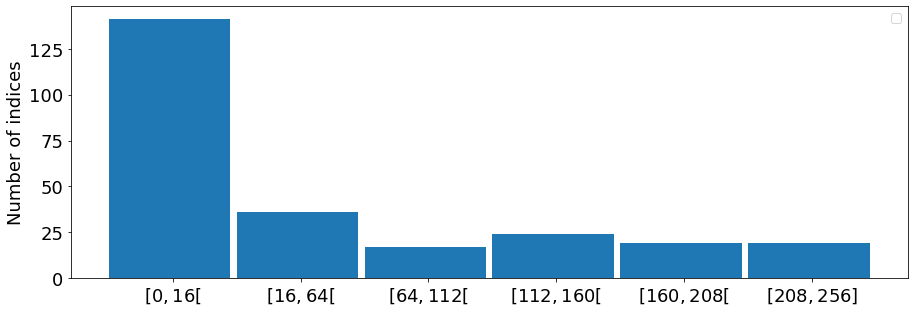

In [45]:
fg, ax = plt.subplots(figsize=(15, 5))
ax.bar(range(6), CONDENSED_ERROR_AFTER_LSM, align='edge', width=0.95)
#ax.tick_params(direction = 'out', length=6, width=2, colors='r', grid_color='r', grid_alpha=0.5)
#plt.xticks(range(17), range(0, 257, 16));
plt.xticks([0.5+j for j in range(6)], label_, rotation=0);
#ax.set_xlabel("Number of wrongly rounded coefficients", fontsize = 16)
ax.set_ylabel("Number of indices", fontsize = 18)
ax.tick_params(axis='both', which='major', labelsize = 18)
ax.legend(loc='upper right', fontsize = 13)
plt.savefig("bar_error.png")